# About the Dataset


* Fashion-MNIST is a dataset of of a training set of 60,000 examples and a test set of 10,000 examples.

* Each example is a 28x28 grayscale image, associated with a label from 10 classes.

* Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

# Task

To come up with a model that can predict label for each image

# Libraries

In [48]:
# For numerical analysis
import numpy as np

# To store and process in a dataframe
import pandas as pd

# For ploting graphs
import matplotlib.pyplot as plt

# Advance ploting
import seaborn as sns



In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
train = pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/fashion-mnist_test.csv')

# Data

In [51]:
print(train.shape)

(60000, 785)


In [52]:
print(test.shape)

(10000, 785)


In [53]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
print(train.isna().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [56]:
print(test.isna().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [57]:
item = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


<ipython-input-58-0fb915ad8131>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x= 'label', palette=['#333333'])
<ipython-input-58-0fb915ad8131>:3: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(train, x= 'label', palette=['#333333'])
<ipython-input-58-0fb915ad8131>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(test,x='label', palette= ['#fb0203'])
<ipython-input-58-0fb915ad8131>:8: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(test,x='label', palette= ['#fb0203'])


[]

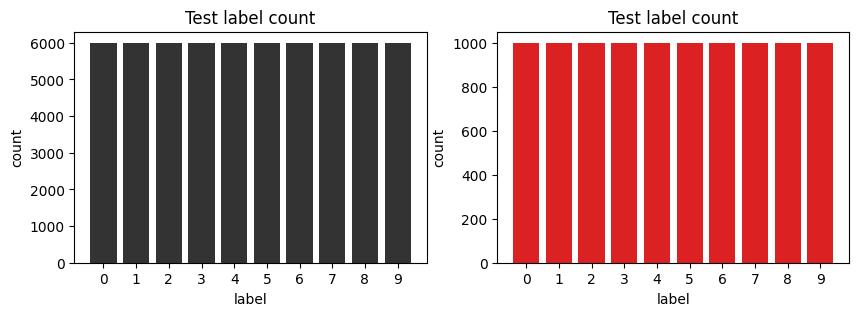

In [58]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot(train, x= 'label', palette=['#333333'])
plt.title('Test label count')
plt.plot()

plt.subplot(1,2,2)
sns.countplot(test,x='label', palette= ['#fb0203'])
plt.title('Test label count')
plt.plot()

<ipython-input-59-4e27a9354d36>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


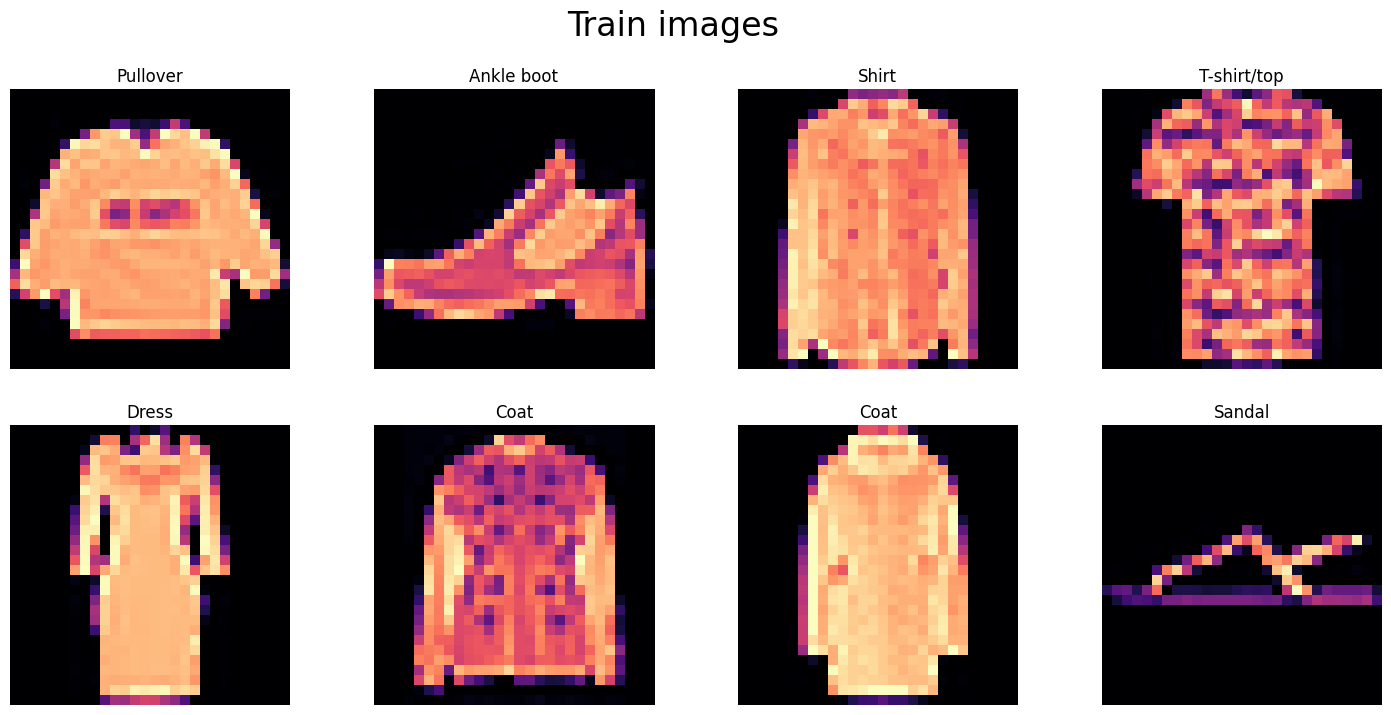

In [59]:
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

<ipython-input-60-a54292fbcaca>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


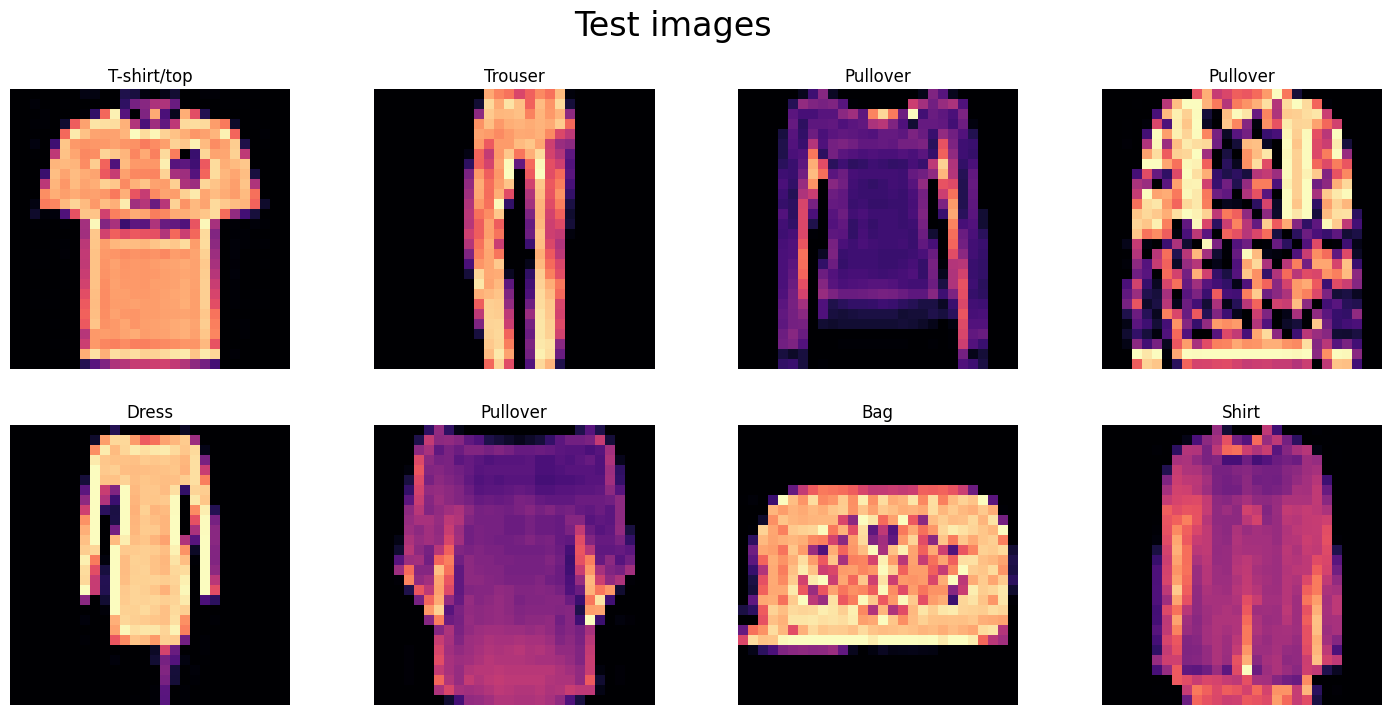

In [60]:
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense, Flatten,Dropout


In [62]:
X_train= train.iloc[:, 1:].to_numpy()
y_train= train['label'].to_numpy()

X_test= test.iloc[:,1:].to_numpy()
y_test= test['label'].to_numpy()
for i in [X_train, y_train, X_test, y_test]:
  print(i.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [63]:
X_train= X_train.reshape(-1, 28, 28, 1)
X_test= X_test.reshape(-1, 28, 28, 1)

In [64]:
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

In [65]:
y_train_enc= to_categorical(y_train, num_classes= 10)
y_test_enc= to_categorical(y_test, num_classes= 10)

In [66]:
for i in [X_train, y_train_enc, X_test, y_test_enc]:
  print(i.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [67]:
X_train, X_val, y_train_enc, y_val_enc= train_test_split(X_train, y_train_enc, test_size= 0.3)
for i in [X_train, y_train_enc, X_val, y_val_enc]:
  print(i.shape)

(42000, 28, 28, 1)
(42000, 10)
(18000, 28, 28, 1)
(18000, 10)


In [68]:
INPUT_SHAPE= (28, 28, 1)
OUTPUT_SHAPE= 10
BATCH_SIZE= 128
EPOCHS= 10
VERBOSE= 2

In [69]:
model= Sequential()

model.add(Conv2D(32, kernel_size= (3, 3), activation= 'relu', input_shape= INPUT_SHAPE))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, kernel_size= (3, 3), activation= 'relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation= 'softmax'))

In [70]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [72]:
history = model.fit(X_train,y_train_enc, epochs= EPOCHS, batch_size= BATCH_SIZE, verbose= VERBOSE, validation_split=0.3)

Epoch 1/10
230/230 - 25s - loss: 1.5642 - accuracy: 0.6799 - val_loss: 0.5032 - val_accuracy: 0.8148 - 25s/epoch - 107ms/step
Epoch 2/10
230/230 - 20s - loss: 0.5452 - accuracy: 0.8043 - val_loss: 0.4180 - val_accuracy: 0.8474 - 20s/epoch - 89ms/step
Epoch 3/10
230/230 - 23s - loss: 0.4560 - accuracy: 0.8365 - val_loss: 0.3859 - val_accuracy: 0.8560 - 23s/epoch - 99ms/step
Epoch 4/10
230/230 - 23s - loss: 0.4030 - accuracy: 0.8551 - val_loss: 0.3786 - val_accuracy: 0.8624 - 23s/epoch - 100ms/step
Epoch 5/10
230/230 - 24s - loss: 0.3614 - accuracy: 0.8676 - val_loss: 0.3592 - val_accuracy: 0.8735 - 24s/epoch - 103ms/step
Epoch 6/10
230/230 - 20s - loss: 0.3336 - accuracy: 0.8787 - val_loss: 0.3356 - val_accuracy: 0.8783 - 20s/epoch - 89ms/step
Epoch 7/10
230/230 - 23s - loss: 0.3032 - accuracy: 0.8874 - val_loss: 0.3263 - val_accuracy: 0.8831 - 23s/epoch - 98ms/step
Epoch 8/10
230/230 - 23s - loss: 0.2894 - accuracy: 0.8911 - val_loss: 0.3224 - val_accuracy: 0.8853 - 23s/epoch - 101ms/s

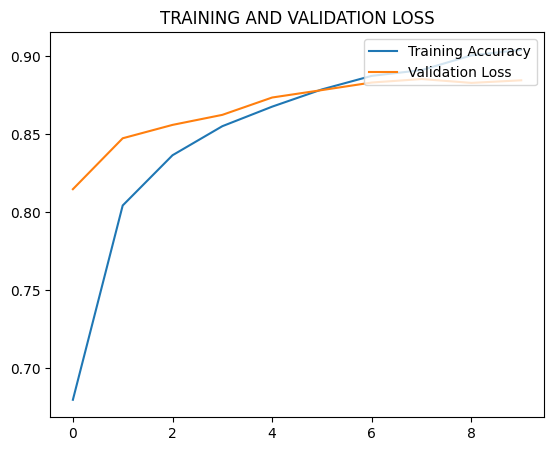

In [73]:
plt.figure(figsize= (14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title('TRAINING AND VALIDATION LOSS')
plt.show()

In [74]:
model.evaluate(X_val, y_val_enc)

563/563 [==============================] - 4s 7ms/step - loss: 0.3366 - accuracy: 0.8831


[0.3366380035877228, 0.883055567741394]

In [75]:
y_pred_enc= model.predict(X_test)
y_pred= [np.argmax(i) for i in y_pred_enc]
print(y_pred_enc[0])
print(y_pred[0])

313/313 [==============================] - 2s 7ms/step
[7.6173508e-01 9.8663342e-08 1.9825684e-04 1.3584006e-04 1.3484845e-05
 2.6305230e-07 2.3791604e-01 2.1179270e-08 8.4764241e-07 4.3007764e-10]
0


<ipython-input-76-78a3facda5ad>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


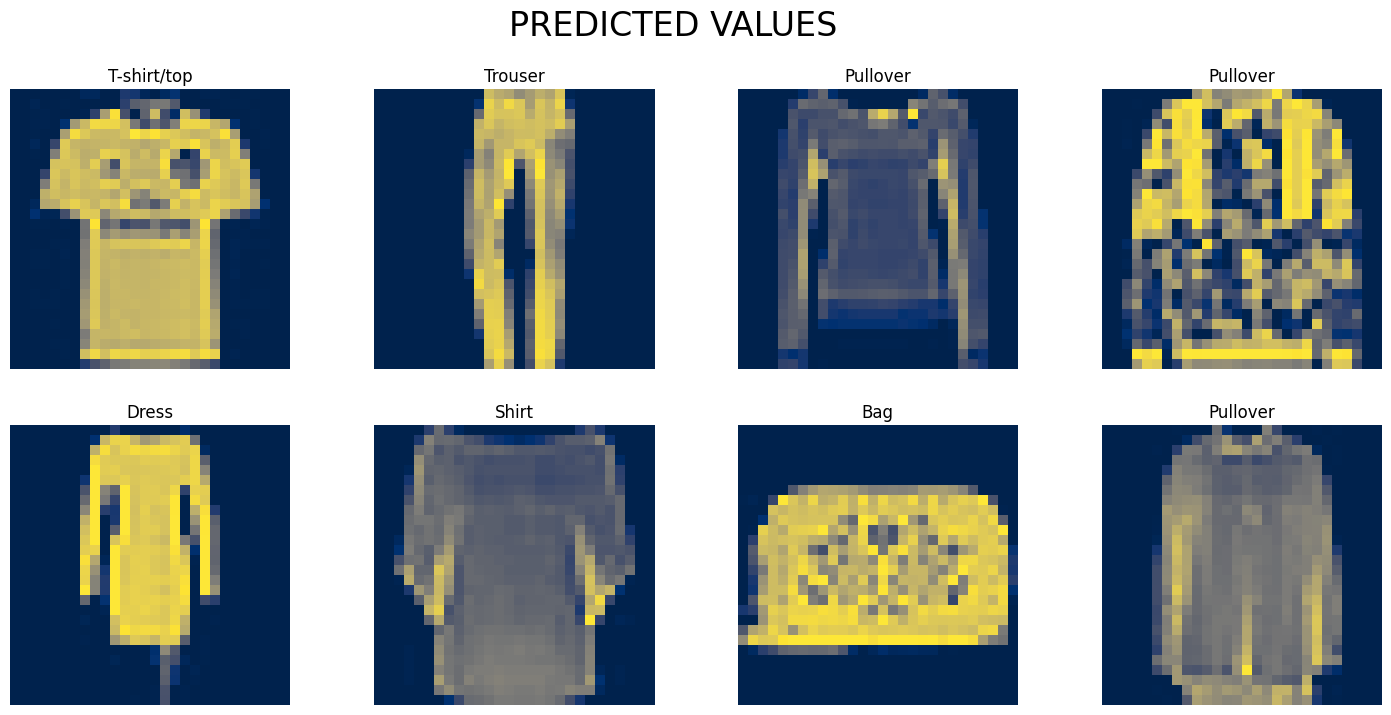

In [76]:
fig,ax= plt.subplots(figsize= (18, 8))
for ind, row in enumerate(X_test[:8]):
  plt.subplot(2, 4, ind+1)
  plt.title(item[y_pred[ind]])
  img= row.reshape(28, 28)
  fig.suptitle('PREDICTED VALUES', fontsize= 24)
  plt.axis('off')
  plt.imshow(img, cmap= 'cividis')

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.98      0.99      0.98      1000
           2       0.79      0.86      0.82      1000
           3       0.85      0.95      0.90      1000
           4       0.85      0.77      0.81      1000
           5       0.97      0.96      0.97      1000
           6       0.73      0.61      0.67      1000
           7       0.97      0.92      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.93      0.98      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



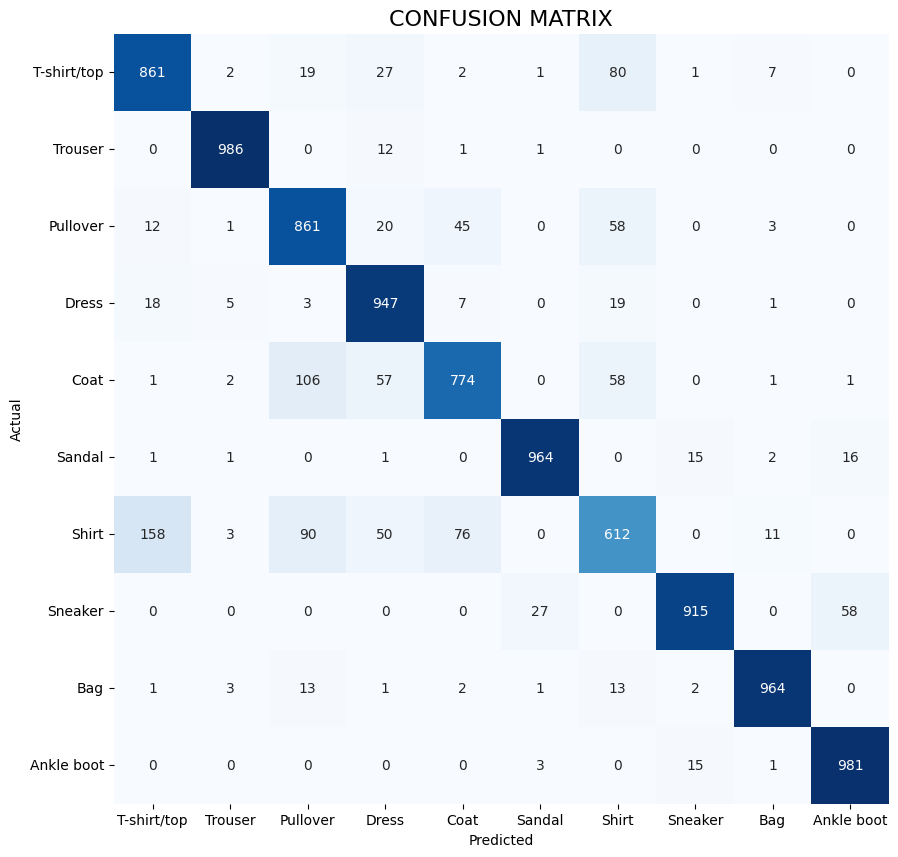

In [78]:
fig, ax= plt.subplots(figsize= (10, 10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False,fmt='1d',cmap='Blues',ax=ax)
ax.set_title('CONFUSION MATRIX', loc= 'center', fontsize= 16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(item.values())
ax.set_yticklabels(item.values(), rotation= 0)
plt.show()